## Warmup Project - Data Exploration

Exploring some basic properties of the Titanic dataset.

In [38]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
# for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import thinkplot

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Note: Looked at Kaggle script for initial idea of what should be imported

In [39]:
#Note: Used linked Kaggle Script to check how to properly read data from csv. Copied those corresp. lines below.

# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
test_df    = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

# preview titanic data
titanic_df.head()

#preview test data
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [40]:
titanic_df = titanic_df.dropna(subset = ['Sex', 'Age', 'SibSp', 'Fare', 'Survived', 'Pclass'])
titanic_df = titanic_df.dropna()

test_df = test_df.dropna()

## Age of Passengers - Histogram

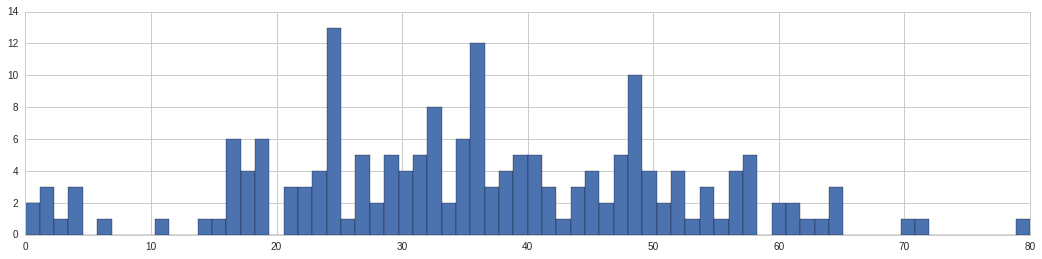

In [41]:
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

# plot original Age values
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
titanic_df['Age'].hist(bins=70, ax=axis1)

## Survival Based on Gender

In [42]:
#if titanic_df['Sex']== 'female':
#    titanic_df['Sex'] = 0
#if titanic_df['Sex']=='male':
#    titanic_df['Sex'] = 1

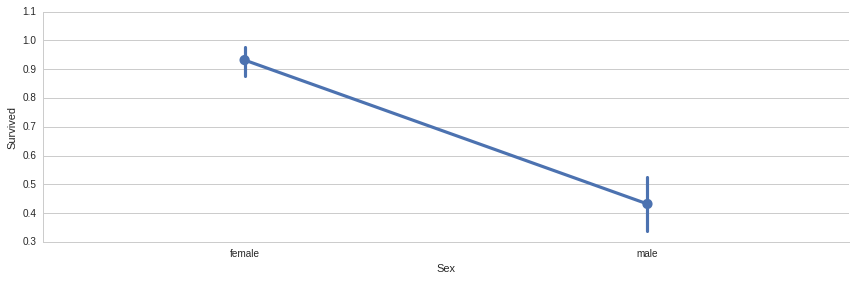

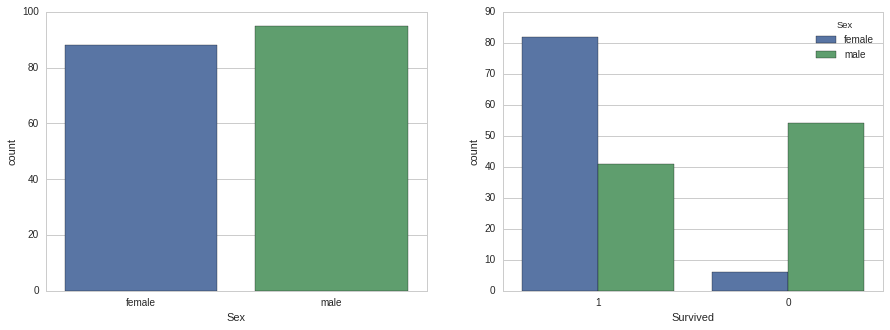

In [43]:
# plot
sns.factorplot('Sex','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Sex', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Sex", data=titanic_df, order=[1,0], ax=axis2)




## Age/Survival Scatterplot

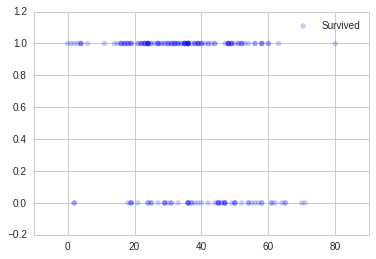

Scatterplots are not effective in observing survival because it is a boolean


In [44]:

age = titanic_df['Age']
survived = titanic_df['Survived']

thinkplot.Scatter(age, survived)
thinkplot.Show()
print 'Scatterplots are not effective in observing survival because it is a boolean'

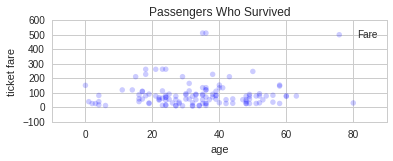

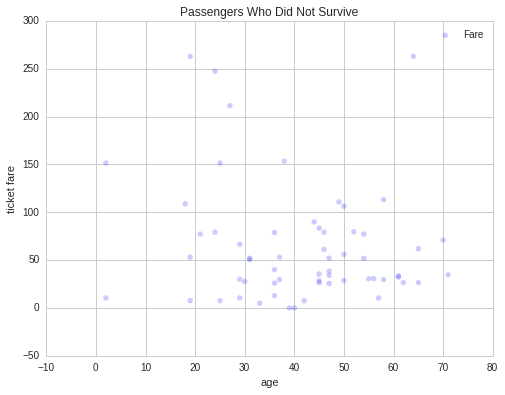

In [45]:
age_not_survived = titanic_df['Age'] [titanic_df["Survived"] == 0]
age_survived = titanic_df['Age'] [titanic_df["Survived"] == 1]

fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]
 
thinkplot.SubPlot(2, rows=2, cols=1)


thinkplot.Scatter(age_survived, fare_survived)
thinkplot.Show(title='Passengers Who Survived', xlabel='age', ylabel='ticket fare')
thinkplot.Scatter(age_not_survived, fare_not_survived)
thinkplot.Show(title='Passengers Who Did Not Survive', xlabel='age', ylabel='ticket fare')